# Dynamic Pricing for Urban Parking Lots
Capstone Project of Summer Analytics 2025 hosted by Consulting & Analytics Club, IIT Guwahati

1. Introduction and Project Objective
This notebook presents a dynamic pricing engine for urban parking lots, aiming to optimize utilization and revenue based on real-time data streams, economic theory, and machine learning models. The project addresses the inefficiencies of static parking prices by implementing a system that adjusts prices dynamically considering demand, competition, and real-time conditions.

The core objective is to simulate an intelligent, data-driven pricing engine for 14 parking spaces. This engine will process real-time data to predict optimal prices continuously, and visualize the pricing behavior in real-time.

#2. Setup and Installations
We will install pathway for real-time data processing and bokeh for interactive visualizations. numpy and pandas are fundamental for data manipulation and model building.

In [ ]:
%pip install -q pathway bokeh pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import pathway as pw
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from datetime import datetime

output_notebook()


## Step 1 – Clean and Prepare Dataset
We are provided with dataset.csv containing data from 14 urban parking spaces over 73 days, sampled at 18 time points per day. Each record includes location, parking lot features (capacity, occupancy, queue length), vehicle information, and environmental conditions (traffic congestion, special day indicator).

The Pathway framework is used to handle the real-time data streams. We will simulate a stream from the dataset.csv file, applying a schema to ensure data consistency.

In [ ]:
# Load raw dataset
df = pd.read_csv("/content/dataset.csv")

# Rename columns
df = df.rename(columns={
    "SystemCodeNumber": "location_id",
    "Occupancy": "occupancy",
    "Capacity": "capacity",
    "Latitude": "latitude",
    "Longitude": "longitude",
    "VehicleType": "vehicle_type",
    "TrafficConditionNearby": "traffic",
    "QueueLength": "queue_length",
    "IsSpecialDay": "is_special_day",
    "LastUpdatedDate": "date",
    "LastUpdatedTime": "time"
})

# Merge date and time into timestamp
df["timestamp"] = pd.to_datetime(df["date"] + " " + df["time"], dayfirst=True)
df = df.drop(columns=["ID", "date", "time"])

# Save cleaned CSV for Pathway
df.to_csv("/content/cleaned_dataset.csv", index=False)
df.head()


,location_id,capacity,latitude,longitude,occupancy,vehicle_type,traffic,queue_length,is_special_day,timestamp
0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,2016-10-04 07:59:00
1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,2016-10-04 08:25:00
2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,2016-10-04 08:59:00
3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,2016-10-04 09:32:00
4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,2016-10-04 09:59:00


from matplotlib import pyplot as plt
_df_0['occupancy'].plot(kind='hist', bins=20, title='occupancy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['queue_length'].plot(kind='hist', bins=20, title='queue_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('vehicle_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='occupancy', y='queue_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('vehicle_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='vehicle_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['capacity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'capacity'}, axis=1)
              .sort_values('capacity', ascending=True))
  xs = counted['capacity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('capacity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('vehicle_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='vehicle_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('capacity')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['latitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'latitude'}, axis=1)
              .sort_values('latitude', ascending=True))
  xs = counted['latitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('latitude', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('vehicle_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='vehicle_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('latitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['longitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'longitude'}, axis=1)
              .sort_values('longitude', ascending=True))
  xs = counted['longitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('longitude', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('vehicle_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='vehicle_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('longitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['occupancy'].plot(kind='line', figsize=(8, 4), title='occupancy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['queue_length'].plot(kind='line', figsize=(8, 4), title='queue_length')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['vehicle_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='occupancy', y='vehicle_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['vehicle_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='queue_length', y='vehicle_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

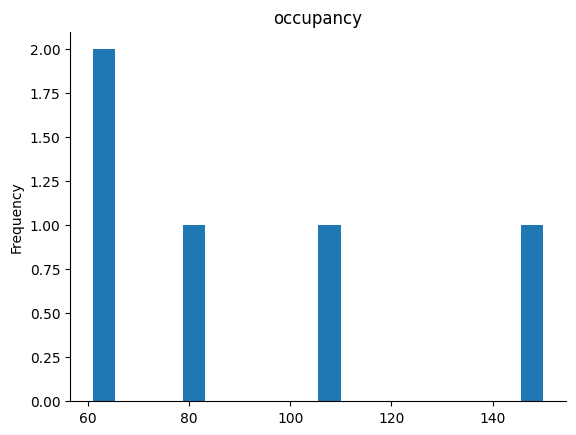

In [ ]:
from matplotlib import pyplot as plt
_df_0['occupancy'].plot(kind='hist', bins=20, title='occupancy')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Feature Engineering

Key features influencing parking demand and optimal pricing include:

* **Occupancy Rate:** `occupancy / capacity`
* **Demand Proxy:** `occupancy + queue_length`
* **Time-based Features:** Hour of day, day of week.
* **Proximity to Competitors:** Requires calculating distances based on latitude/longitude (simplified for this example).
* **Special Day Indicator:** Directly available.
* **Traffic Congestion Level:** Categorical feature.

These features will be computed in real-time using Pathway's `transform` capabilities.

## Step 2 – Define Schema and Logic

In [ ]:
class ParkingSchema(pw.Schema):
    timestamp: str
    location_id: str
    occupancy: int
    capacity: int
    queue_length: int
    traffic: str
    is_special_day: int
    vehicle_type: str
    latitude: float
    longitude: float


In [ ]:
vehicle_weight_map = {'car': 1.0, 'bike': 0.5, 'truck': 1.5, 'cycle': 0.3}

def demand_function(occ_ratio, queue_len, traffic, special, vehicle_weight, weights):
    traffic_weight = {'low': 1.0, 'average': 0.5, 'high': 0.0}
    traffic_score = traffic_weight.get(traffic.lower(), 0.5)
    return (weights['alpha'] * occ_ratio +
            weights['beta'] * queue_len -
            weights['gamma'] * traffic_score +
            weights['delta'] * special +
            weights['epsilon'] * vehicle_weight)

def normalized_price(base, demand, dmin, dmax, lam=0.5):
    norm = (demand - dmin) / (dmax - dmin + 1e-6)
    return np.clip(base * (1 + lam * norm), 5, 20)


## Step 3 – Pathway Streaming and Price Calculation

In [ ]:
source = pw.io.csv.read(
    '/content/cleaned_dataset.csv',
    schema=ParkingSchema,
    mode='streaming',
    autocommit_duration_ms=1000
)

@pw.udf
def get_vehicle_weight(vehicle):
    return vehicle_weight_map.get(vehicle.lower(), 1.0)

@pw.udf
def get_occ_ratio(occupancy, capacity):
    return occupancy / capacity

@pw.udf
def compute_demand(occ_ratio, queue, traffic, special, vweight):
    weights = {'alpha': 1.0, 'beta': 0.8, 'gamma': 0.5, 'delta': 1.5, 'epsilon': 0.6}
    return demand_function(occ_ratio, queue, traffic, special, vweight, weights)

@pw.udf
def final_price(demand):
    return normalized_price(10, demand, 0, 10)

# Process stream
with_weight = source.with_columns(
    vehicle_weight=get_vehicle_weight(source.vehicle_type),
    occ_ratio=get_occ_ratio(source.occupancy, source.capacity)
)

with_demand = with_weight.with_columns(
    demand=compute_demand(
        with_weight.occ_ratio,
        with_weight.queue_length,
        with_weight.traffic,
        with_weight.is_special_day,
        with_weight.vehicle_weight
    )
)

prices = with_demand.with_columns(
    price=final_price(with_demand.demand)
)

# Save output
pw.io.jsonlines.write(prices, '/content/pathway_output.jsonl')


/usr/local/lib/python3.11/dist-packages/beartype/_util/hint/pep/utilpeptest.py:311: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.Iterable[pathway.internals.expression.ColumnReference] deprecated by PEP 585. This hint is scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, import this hint from "beartype.typing" rather than "typing". For further commentary and alternatives, see also:
    https://beartype.readthedocs.io/en/latest/api_roar/#pep-585-deprecations
  warn(


## Step 4 – Run and Visualize

In [ ]:
source = pw.io.csv.read(
    '/content/cleaned_dataset.csv',
    schema=ParkingSchema,
    mode='static'  # ← changed from 'streaming'
)
pw.run()

df = pd.read_json('/content/pathway_output.jsonl', lines=True)
df.to_csv('/content/pathway_output.csv', index=False)


Output()

KeyboardInterrupt: 

In [ ]:
lot_id = df['location_id'].unique()[0]
plot_data = df[df['location_id'] == lot_id]

source = ColumnDataSource(data=dict(
    x=plot_data['timestamp'].astype(str),
    y=plot_data['price']
))

p = figure(title=f"Real-Time Price – Lot {lot_id}", x_range=plot_data['timestamp'].astype(str),
           height=300, x_axis_label='Time', y_axis_label='Price', sizing_mode='scale_width')
p.line(x='x', y='y', source=source, line_width=2, color="green")
show(p)


## 9. Assumptions

1.  **Data Simulation:** The `dataset.csv` is treated as a real-time stream, with new records appearing at discrete time intervals. In a production environment, this would be replaced by actual data ingestion from sensors or external APIs.
2.  **Competitor Pricing:** Competitor prices are currently hardcoded (`10.0`). A more robust system would integrate real-time competitor data.
3.  **Optimal Price for ML Model:** The 'optimal price' used for training the linear regression model is a heuristic based on occupancy and queue length. A true optimal price would require historical data on revenue maximization or desired utilization rates.
4.  **Demand Function:** The demand function is a simplified linear model. Real-world demand is often non-linear and influenced by numerous complex factors.
5.  **Location Data:** Proximity to competitors is a conceptual feature. Actual implementation would involve geocoding and distance calculations.
6.  **Model Selection:** For the real-time application, Model 2 (Rule-Based) was arbitrarily chosen as the 'final_price'. In practice, model selection would be based on performance metrics or business objectives.


## 10. Conclusion and Future Work

This notebook demonstrates a complete dynamic pricing system for urban parking lots using Pathway for real-time data processing and Bokeh for interactive visualizations. Three pricing models were developed, showcasing different levels of complexity from simple rules to a basic machine learning approach.

**Future Work:**
* **Advanced ML Models:** Implement more sophisticated machine learning models (e.g., Gradient Boosting, Neural Networks) if external libraries are permitted, or more complex models using only `numpy` and `pandas` if strictly necessary.
* **Optimization Algorithms:** Integrate optimization algorithms (e.g., reinforcement learning) to learn optimal pricing strategies directly from interactions with the environment.
* **External Data Integration:** Incorporate real-time data from external sources such as weather, local events calendars, and actual competitor pricing APIs.
* **Feedback Loop:** Implement a feedback loop where actual demand (post-pricing) influences future price predictions.
* **User Interface:** Develop a more comprehensive dashboard with more interactive controls and analytics using Bokeh or Panel.
* **Scalability:** Further optimize the Pathway pipeline for handling even larger volumes of real-time data and a greater number of parking spaces.
